<a href="https://colab.research.google.com/github/megano/vaccine/blob/main/prioritization_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
# import CCVI & census data csv
df_raw = pd.read_csv('https://storage.googleapis.com/ccvi_county/ccvi_county.csv') #, index_col='[index]')
df_raw.head()

,State,State Abbreviation,County,FIPS (5-digit),THEME 1: Socioeconomic Status,THEME 2:\nHousehold Composition & Disability,THEME 3: \nMinority Status & Language,THEME 4: \nHousing Type & Transportation,THEME 5: Epidemiological Factors,THEME 6: Healthcare System Factors,CCVI SCORE\nHigher = More Vulnerable
0,Alabama,AL,Autauga,1001,0.357,0.566,0.592,0.314,0.833,0.935,0.777
1,Alabama,AL,Baldwin,1003,0.240,0.244,0.432,0.335,0.380,0.768,0.362
2,Alabama,AL,Barbour,1005,0.973,0.839,0.897,0.640,0.778,0.936,0.991
3,Alabama,AL,Bibb,1007,0.746,0.249,0.443,0.743,0.726,0.927,0.775
4,Alabama,AL,Blount,1009,0.635,0.432,0.583,0.322,0.630,0.509,0.612


In [ ]:
# filter out California data

# surpress SettingWithCopyError message 
pd.options.mode.chained_assignment = None

ca_df_raw = df_raw.loc[df_raw['State Abbreviation'] == "CA"]
ca_df_raw.head()

,State,State Abbreviation,County,FIPS (5-digit),THEME 1: Socioeconomic Status,THEME 2:\nHousehold Composition & Disability,THEME 3: \nMinority Status & Language,THEME 4: \nHousing Type & Transportation,THEME 5: Epidemiological Factors,THEME 6: Healthcare System Factors,CCVI SCORE\nHigher = More Vulnerable
186,California,CA,Alameda,6001,0.184,0.028,0.971,0.604,0.093,0.022,0.097
187,California,CA,Alpine,6003,0.813,0.787,0.747,0.989,0.288,0.003,0.515
188,California,CA,Amador,6005,0.387,0.303,0.612,0.593,0.396,0.006,0.156
189,California,CA,Butte,6007,0.607,0.327,0.776,0.758,0.057,0.111,0.235
190,California,CA,Calaveras,6009,0.362,0.639,0.548,0.126,0.230,0.032,0.098


In [ ]:
# check if this is has the correct number of counties. California has 58 counties
len(ca_df_raw)

58

In [ ]:
# add covid information for each county. CC stands for confirmed cases
df_covid_cc_US = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv")

df_covid_cc_CA = df_covid_cc_US.loc[df_covid_cc_US['Province_State'] == "California"]
# check if we have 58 counties
#len(df_covid_cc_CA)
#60

df_covid_cc_CA.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21
195,84006001,US,USA,840,6001.0,Alameda,California,US,37.646294,-121.892927,"Alameda, California, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,30980,31204,31871,32781,33477,33887,34373,35047,35686,36281,37027,38218,39252,40026,40751,41548,42196,43109,44004,44756,45751,46753,47527,48365,49084,49796,50405,50946,51590,52475,53518,54518,55073,55899,56432,57081,57921,59172,60125,61111
196,84006003,US,USA,840,6003.0,Alpine,California,US,38.596786,-119.822359,"Alpine, California, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,52,57,57,57,57,57,57,58,63,63,63,63,63,64,64,64,64,64,65,65,64,64,64,65,65,65,65,66,67,67,68,68,68,71,71,71,71,72,72,72
197,84006005,US,USA,840,6005.0,Amador,California,US,38.445831,-120.656960,"Amador, California, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,740,832,917,991,1020,1137,1162,1203,1227,1289,1513,1637,1681,1711,1748,1788,1846,1943,2043,2081,2115,2157,2189,2219,2281,2359,2394,2442,2502,2515,2562,2613,2671,2701,2717,2761,2761,2811,2824,2861
198,84006007,US,USA,840,6007.0,Butte,California,US,39.667278,-121.600525,"Butte, California, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4244,4305,4417,4455,4527,4638,4706,4757,4863,4941,4972,5103,5202,5574,5668,5765,5906,6118,6228,6344,6473,6588,6716,6873,6968,7016,7053,7178,7269,7405,7589,7750,7835,7893,8008,8217,8278,8430,8552,8665
199,84006009,US,USA,840,6009.0,Calaveras,California,US,38.205371,-120.552913,"Calaveras, California, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,553,572,585,606,606,606,657,670,684,697,708,710,718,799,821,848,870,900,926,963,988,1002,1032,1062,1084,1097,1102,1111,1131,1161,1186,1230,1248,1276,1292,1321,1342,1385,1425,1449


In [ ]:
# need to clean the data and find the 2 extra records in df_covid_cc_CA

# first grab all the county names in combined_key and remove the California, US to get the County names.
df_covid_cc_CA['Combined_Key'] = df_covid_cc_CA['Combined_Key'].apply(lambda x: x.split(",")[0])
df_covid_cc_CA.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21
195,84006001,US,USA,840,6001.0,Alameda,California,US,37.646294,-121.892927,Alameda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,30980,31204,31871,32781,33477,33887,34373,35047,35686,36281,37027,38218,39252,40026,40751,41548,42196,43109,44004,44756,45751,46753,47527,48365,49084,49796,50405,50946,51590,52475,53518,54518,55073,55899,56432,57081,57921,59172,60125,61111
196,84006003,US,USA,840,6003.0,Alpine,California,US,38.596786,-119.822359,Alpine,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,52,57,57,57,57,57,57,58,63,63,63,63,63,64,64,64,64,64,65,65,64,64,64,65,65,65,65,66,67,67,68,68,68,71,71,71,71,72,72,72
197,84006005,US,USA,840,6005.0,Amador,California,US,38.445831,-120.656960,Amador,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,740,832,917,991,1020,1137,1162,1203,1227,1289,1513,1637,1681,1711,1748,1788,1846,1943,2043,2081,2115,2157,2189,2219,2281,2359,2394,2442,2502,2515,2562,2613,2671,2701,2717,2761,2761,2811,2824,2861
198,84006007,US,USA,840,6007.0,Butte,California,US,39.667278,-121.600525,Butte,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4244,4305,4417,4455,4527,4638,4706,4757,4863,4941,4972,5103,5202,5574,5668,5765,5906,6118,6228,6344,6473,6588,6716,6873,6968,7016,7053,7178,7269,7405,7589,7750,7835,7893,8008,8217,8278,8430,8552,8665
199,84006009,US,USA,840,6009.0,Calaveras,California,US,38.205371,-120.552913,Calaveras,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,553,572,585,606,606,606,657,670,684,697,708,710,718,799,821,848,870,900,926,963,988,1002,1032,1062,1084,1097,1102,1111,1131,1161,1186,1230,1248,1276,1292,1321,1342,1385,1425,1449


In [ ]:
print(len(df_covid_cc_CA.Combined_Key.values))
print(len(ca_df_raw.County.values))

60
58


In [ ]:
lst1 = df_covid_cc_CA.Combined_Key.values
lst2 = ca_df_raw.County.values

new_list = [
    list(set(lst1).difference(lst2))
]
new_list

# We see covid confirmed cases US has two rows that we have to remove 'Out of CA', 'Unassigned'

[['Unassigned', 'Out of CA']]

In [ ]:
# extract rows 'Out of CA', 'Unassigned'
df_covid_cc_CA.drop(df_covid_cc_CA.loc[df_covid_cc_CA['Combined_Key']=="Out of CA"].index, inplace=True)
df_covid_cc_CA.drop(df_covid_cc_CA.loc[df_covid_cc_CA['Combined_Key']=="Unassigned"].index, inplace=True)
len(df_covid_cc_CA)

58

In [ ]:
# Check if we have identical Counties
import numpy as np
check_counties = (np.array(ca_df_raw.County.values) == np.array(df_covid_cc_CA.Combined_Key.values))
check_counties

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [ ]:
# creata total_cases row
df_covid_cc_CA['total_cases']= df_covid_cc_CA[df_covid_cc_CA.columns[-1]]
df_covid_cc_CA.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,total_cases
195,84006001,US,USA,840,6001.0,Alameda,California,US,37.646294,-121.892927,Alameda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,31204,31871,32781,33477,33887,34373,35047,35686,36281,37027,38218,39252,40026,40751,41548,42196,43109,44004,44756,45751,46753,47527,48365,49084,49796,50405,50946,51590,52475,53518,54518,55073,55899,56432,57081,57921,59172,60125,61111,61111
196,84006003,US,USA,840,6003.0,Alpine,California,US,38.596786,-119.822359,Alpine,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,57,57,57,57,57,57,58,63,63,63,63,63,64,64,64,64,64,65,65,64,64,64,65,65,65,65,66,67,67,68,68,68,71,71,71,71,72,72,72,72
197,84006005,US,USA,840,6005.0,Amador,California,US,38.445831,-120.656960,Amador,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,832,917,991,1020,1137,1162,1203,1227,1289,1513,1637,1681,1711,1748,1788,1846,1943,2043,2081,2115,2157,2189,2219,2281,2359,2394,2442,2502,2515,2562,2613,2671,2701,2717,2761,2761,2811,2824,2861,2861
198,84006007,US,USA,840,6007.0,Butte,California,US,39.667278,-121.600525,Butte,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4305,4417,4455,4527,4638,4706,4757,4863,4941,4972,5103,5202,5574,5668,5765,5906,6118,6228,6344,6473,6588,6716,6873,6968,7016,7053,7178,7269,7405,7589,7750,7835,7893,8008,8217,8278,8430,8552,8665,8665
199,84006009,US,USA,840,6009.0,Calaveras,California,US,38.205371,-120.552913,Calaveras,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,572,585,606,606,606,657,670,684,697,708,710,718,799,821,848,870,900,926,963,988,1002,1032,1062,1084,1097,1102,1111,1131,1161,1186,1230,1248,1276,1292,1321,1342,1385,1425,1449,1449


In [ ]:
# Check total confirmed total cases in CA
df_covid_cc_CA["total_cases"].sum()

2753739

In [ ]:
# Now merge Lat, Lon_ and total cases with ca_df_raw
ca_df_raw["Longitude"] = df_covid_cc_CA.Long_.values
ca_df_raw["Latitude"] = df_covid_cc_CA.Lat.values
ca_df_raw["Total Covid19 Cases"] = df_covid_cc_CA.total_cases.values

ca_df_raw.head()

,State,State Abbreviation,County,FIPS (5-digit),THEME 1: Socioeconomic Status,THEME 2:\nHousehold Composition & Disability,THEME 3: \nMinority Status & Language,THEME 4: \nHousing Type & Transportation,THEME 5: Epidemiological Factors,THEME 6: Healthcare System Factors,CCVI SCORE\nHigher = More Vulnerable,Longitude,Latitude,Total Covid19 Cases
186,California,CA,Alameda,6001,0.184,0.028,0.971,0.604,0.093,0.022,0.097,-121.892927,37.646294,61111
187,California,CA,Alpine,6003,0.813,0.787,0.747,0.989,0.288,0.003,0.515,-119.822359,38.596786,72
188,California,CA,Amador,6005,0.387,0.303,0.612,0.593,0.396,0.006,0.156,-120.656960,38.445831,2861
189,California,CA,Butte,6007,0.607,0.327,0.776,0.758,0.057,0.111,0.235,-121.600525,39.667278,8665
190,California,CA,Calaveras,6009,0.362,0.639,0.548,0.126,0.230,0.032,0.098,-120.552913,38.205371,1449


In [ ]:
# Now we need to add total number of covid19 deaths per county to the ca_df_raw
# add covid death information for each county. 
df_covid_deaths_US = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv")

df_covid_deaths_CA = df_covid_deaths_US.loc[df_covid_deaths_US['Province_State'] == "California"]

df_covid_deaths_CA.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,...,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21
195,84006001,US,USA,840,6001.0,Alameda,California,US,37.646294,-121.892927,"Alameda, California, US",1671329,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,522,522,522,522,522,525,526,533,538,542,542,546,558,563,574,574,585,587,588,609,616,619,619,625,625,625,625,625,657,657,659,659,659,681,697,713,729,732,733,736
196,84006003,US,USA,840,6003.0,Alpine,California,US,38.596786,-119.822359,"Alpine, California, US",1129,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
197,84006005,US,USA,840,6005.0,Amador,California,US,38.445831,-120.656960,"Amador, California, US",39752,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,16,16,17,17,17,17,18,18,19,19,19,19,20,20,20,21,23,23,23,23,23,23,23,23,23,23,23,24,24,24,24,24,24,24,26,26,26,26,26,26
198,84006007,US,USA,840,6007.0,Butte,California,US,39.667278,-121.600525,"Butte, California, US",219186,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,60,60,60,60,60,62,62,64,64,67,67,67,67,67,74,75,78,78,78,83,83,83,83,83,83,83,88,90,96,96,96,96,96,100,100,102,102,111,111,111
199,84006009,US,USA,840,6009.0,Calaveras,California,US,38.205371,-120.552913,"Calaveras, California, US",45905,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22


In [ ]:
# we clean the data and just grab the county name in Combined_Key column
df_covid_deaths_CA['Combined_Key'] = df_covid_deaths_CA['Combined_Key'].apply(lambda x: x.split(",")[0])
df_covid_deaths_CA.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,...,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21
195,84006001,US,USA,840,6001.0,Alameda,California,US,37.646294,-121.892927,Alameda,1671329,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,522,522,522,522,522,525,526,533,538,542,542,546,558,563,574,574,585,587,588,609,616,619,619,625,625,625,625,625,657,657,659,659,659,681,697,713,729,732,733,736
196,84006003,US,USA,840,6003.0,Alpine,California,US,38.596786,-119.822359,Alpine,1129,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
197,84006005,US,USA,840,6005.0,Amador,California,US,38.445831,-120.656960,Amador,39752,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,16,16,17,17,17,17,18,18,19,19,19,19,20,20,20,21,23,23,23,23,23,23,23,23,23,23,23,24,24,24,24,24,24,24,26,26,26,26,26,26
198,84006007,US,USA,840,6007.0,Butte,California,US,39.667278,-121.600525,Butte,219186,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,60,60,60,60,60,62,62,64,64,67,67,67,67,67,74,75,78,78,78,83,83,83,83,83,83,83,88,90,96,96,96,96,96,100,100,102,102,111,111,111
199,84006009,US,USA,840,6009.0,Calaveras,California,US,38.205371,-120.552913,Calaveras,45905,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22


In [ ]:
# extract rows 'Out of CA', 'Unassigned'
df_covid_deaths_CA.drop(df_covid_deaths_CA.loc[df_covid_deaths_CA['Combined_Key']=="Out of CA"].index, inplace=True)
df_covid_deaths_CA.drop(df_covid_deaths_CA.loc[df_covid_deaths_CA['Combined_Key']=="Unassigned"].index, inplace=True)
len(df_covid_deaths_CA)

58

In [ ]:
# creata total_death row
df_covid_deaths_CA['total_deaths']= df_covid_deaths_CA[df_covid_deaths_CA.columns[-1]]
df_covid_deaths_CA.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,...,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,total_deaths
195,84006001,US,USA,840,6001.0,Alameda,California,US,37.646294,-121.892927,Alameda,1671329,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,522,522,522,522,525,526,533,538,542,542,546,558,563,574,574,585,587,588,609,616,619,619,625,625,625,625,625,657,657,659,659,659,681,697,713,729,732,733,736,736
196,84006003,US,USA,840,6003.0,Alpine,California,US,38.596786,-119.822359,Alpine,1129,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
197,84006005,US,USA,840,6005.0,Amador,California,US,38.445831,-120.656960,Amador,39752,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,16,17,17,17,17,18,18,19,19,19,19,20,20,20,21,23,23,23,23,23,23,23,23,23,23,23,24,24,24,24,24,24,24,26,26,26,26,26,26,26
198,84006007,US,USA,840,6007.0,Butte,California,US,39.667278,-121.600525,Butte,219186,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,60,60,60,60,62,62,64,64,67,67,67,67,67,74,75,78,78,78,83,83,83,83,83,83,83,88,90,96,96,96,96,96,100,100,102,102,111,111,111,111
199,84006009,US,USA,840,6009.0,Calaveras,California,US,38.205371,-120.552913,Calaveras,45905,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22


In [ ]:
# Check total deaths CA
df_covid_deaths_CA["total_deaths"].sum()

30260

In [ ]:
# Now merge total deaths with df_raw
ca_df_raw["Total Covid19 Deaths"] = df_covid_deaths_CA.total_deaths.values

ca_df_raw.head()

,State,State Abbreviation,County,FIPS (5-digit),THEME 1: Socioeconomic Status,THEME 2:\nHousehold Composition & Disability,THEME 3: \nMinority Status & Language,THEME 4: \nHousing Type & Transportation,THEME 5: Epidemiological Factors,THEME 6: Healthcare System Factors,CCVI SCORE\nHigher = More Vulnerable,Longitude,Latitude,Total Covid19 Cases,Total Covid19 Deaths
186,California,CA,Alameda,6001,0.184,0.028,0.971,0.604,0.093,0.022,0.097,-121.892927,37.646294,61111,736
187,California,CA,Alpine,6003,0.813,0.787,0.747,0.989,0.288,0.003,0.515,-119.822359,38.596786,72,0
188,California,CA,Amador,6005,0.387,0.303,0.612,0.593,0.396,0.006,0.156,-120.656960,38.445831,2861,26
189,California,CA,Butte,6007,0.607,0.327,0.776,0.758,0.057,0.111,0.235,-121.600525,39.667278,8665,111
190,California,CA,Calaveras,6009,0.362,0.639,0.548,0.126,0.230,0.032,0.098,-120.552913,38.205371,1449,22


In [ ]:
# import hospital data 
hospital_raw = pd.read_csv("https://data.ca.gov/dataset/529ac907-6ba1-4cb7-9aae-8966fc96aeef/resource/42d33765-20fd-44b8-a978-b083b7542225/download/hospitals_by_county.csv")
hospital_raw

,county,todays_date,hospitalized_covid_confirmed_patients,hospitalized_suspected_covid_patients,hospitalized_covid_patients,all_hospital_beds,icu_covid_confirmed_patients,icu_suspected_covid_patients,icu_available_beds
0,Lake,2020-03-29,0.0,1.0,NaN,NaN,0.0,1.0,2.0
1,Sonoma,2020-03-29,7.0,20.0,NaN,NaN,2.0,5.0,12.0
2,Tulare,2020-03-29,6.0,13.0,NaN,NaN,5.0,3.0,7.0
3,Ventura,2020-03-29,24.0,85.0,NaN,NaN,5.0,19.0,14.0
4,El Dorado,2020-03-29,0.0,6.0,NaN,NaN,0.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...
16120,Modoc,2021-01-10,1.0,0.0,1.0,11.0,0.0,0.0,0.0
16121,Del Norte,2021-01-10,2.0,0.0,2.0,51.0,0.0,0.0,3.0
16122,San Bernardino,2021-01-10,1720.0,75.0,1795.0,3746.0,356.0,9.0,38.0
16123,Shasta,2021-01-10,49.0,1.0,50.0,567.0,8.0,0.0,7.0


In [ ]:
# First we need to change todays_date column to a datetime column
hospital_raw['todays_date'] = pd.to_datetime(hospital_raw['todays_date'])
most_recent_date = hospital_raw["todays_date"].max()
most_recent_date.date()

# hospital_raw = hospital_raw.loc[hospital_raw['todays_date'] == most_recent_date ]
# hospital_raw
x = hospital_raw.groupby(by=["county"]).sum()
len(x.index)

lst3 = list(x.index)

new_list1 = [
    list(set(lst2).difference(lst3))
]
new_list1

# No hospital data from Alpine and Sierra

[['Sierra', 'Alpine']]

In [ ]:
# we grab the data from the most recent date
hospital_raw = hospital_raw.loc[hospital_raw['todays_date'] == most_recent_date ]

# create a columns list 
columns_lst = list(hospital_raw.columns)

# create an empty list to add the cities that don't have hospital data.
empty_list = []

# loop over new_list1[0]
for i in new_list1[0]:
  data = [str(i),most_recent_date,None,None,None,None,None,None,None]
  empty_list.append(data)

# create a second dataframe
hospital_raw_df2 = pd.DataFrame(empty_list,columns=columns_lst)

# append the second dataframe to hospital_raw
hospital_raw = hospital_raw.append(hospital_raw_df2, ignore_index=True)

# we sort the hospital data by county name
hospital_raw = hospital_raw.sort_values("county")

# length should be 58
len(hospital_raw)

58

In [ ]:
# check hospital data now
hospital_raw.head()

,county,todays_date,hospitalized_covid_confirmed_patients,hospitalized_suspected_covid_patients,hospitalized_covid_patients,all_hospital_beds,icu_covid_confirmed_patients,icu_suspected_covid_patients,icu_available_beds
20,Alameda,2021-01-10,424,37,461,2516,113,4,68
57,Alpine,2021-01-10,None,None,None,None,None,None,None
46,Amador,2021-01-10,7,0,7,52,3,0,0
5,Butte,2021-01-10,73,1,74,451,8,0,14
11,Calaveras,2021-01-10,12,0,12,33,4,0,3


In [ ]:
# now we add the hospital data to our original ca_df_raw

# Now merge the hospital data to each county in ca_df_raw
ca_df_raw["todays_date"] = hospital_raw.todays_date.values
ca_df_raw["hospitalized_covid_confirmed_patients"] = hospital_raw.hospitalized_covid_confirmed_patients.values
ca_df_raw["hospitalized_suspected_covid_patients"] = hospital_raw.hospitalized_suspected_covid_patients.values
ca_df_raw["hospitalized_covid_patients"] = hospital_raw.hospitalized_covid_patients.values
ca_df_raw["all_hospital_beds"] = hospital_raw.all_hospital_beds.values
ca_df_raw["icu_covid_confirmed_patients"] = hospital_raw.icu_covid_confirmed_patients.values
ca_df_raw["icu_suspected_covid_patients"] = hospital_raw.icu_suspected_covid_patients.values
ca_df_raw["icu_available_beds"] = hospital_raw.icu_available_beds.values

ca_df_raw.head()

,State,State Abbreviation,County,FIPS (5-digit),THEME 1: Socioeconomic Status,THEME 2:\nHousehold Composition & Disability,THEME 3: \nMinority Status & Language,THEME 4: \nHousing Type & Transportation,THEME 5: Epidemiological Factors,THEME 6: Healthcare System Factors,CCVI SCORE\nHigher = More Vulnerable,Longitude,Latitude,Total Covid19 Cases,Total Covid19 Deaths,todays_date,hospitalized_covid_confirmed_patients,hospitalized_suspected_covid_patients,hospitalized_covid_patients,all_hospital_beds,icu_covid_confirmed_patients,icu_suspected_covid_patients,icu_available_beds
186,California,CA,Alameda,6001,0.184,0.028,0.971,0.604,0.093,0.022,0.097,-121.892927,37.646294,61111,736,2021-01-10,424,37,461,2516,113,4,68
187,California,CA,Alpine,6003,0.813,0.787,0.747,0.989,0.288,0.003,0.515,-119.822359,38.596786,72,0,2021-01-10,None,None,None,None,None,None,None
188,California,CA,Amador,6005,0.387,0.303,0.612,0.593,0.396,0.006,0.156,-120.656960,38.445831,2861,26,2021-01-10,7,0,7,52,3,0,0
189,California,CA,Butte,6007,0.607,0.327,0.776,0.758,0.057,0.111,0.235,-121.600525,39.667278,8665,111,2021-01-10,73,1,74,451,8,0,14
190,California,CA,Calaveras,6009,0.362,0.639,0.548,0.126,0.230,0.032,0.098,-120.552913,38.205371,1449,22,2021-01-10,12,0,12,33,4,0,3


In [ ]:
# cleaned data as of now 
ca_df_raw

,State,State Abbreviation,County,FIPS (5-digit),THEME 1: Socioeconomic Status,THEME 2:\nHousehold Composition & Disability,THEME 3: \nMinority Status & Language,THEME 4: \nHousing Type & Transportation,THEME 5: Epidemiological Factors,THEME 6: Healthcare System Factors,CCVI SCORE\nHigher = More Vulnerable,Longitude,Latitude,Total Covid19 Cases,Total Covid19 Deaths,todays_date,hospitalized_covid_confirmed_patients,hospitalized_suspected_covid_patients,hospitalized_covid_patients,all_hospital_beds,icu_covid_confirmed_patients,icu_suspected_covid_patients,icu_available_beds
186,California,CA,Alameda,6001,0.184,0.028,0.971,0.604,0.093,0.022,0.097,-121.892927,37.646294,61111,736,2021-01-10,424,37,461,2516,113,4,68
187,California,CA,Alpine,6003,0.813,0.787,0.747,0.989,0.288,0.003,0.515,-119.822359,38.596786,72,0,2021-01-10,None,None,None,None,None,None,None
188,California,CA,Amador,6005,0.387,0.303,0.612,0.593,0.396,0.006,0.156,-120.656960,38.445831,2861,26,2021-01-10,7,0,7,52,3,0,0
189,California,CA,Butte,6007,0.607,0.327,0.776,0.758,0.057,0.111,0.235,-121.600525,39.667278,8665,111,2021-01-10,73,1,74,451,8,0,14
190,California,CA,Calaveras,6009,0.362,0.639,0.548,0.126,0.230,0.032,0.098,-120.552913,38.205371,1449,22,2021-01-10,12,0,12,33,4,0,3
191,California,CA,Colusa,6011,0.690,0.577,0.989,0.888,0.067,0.007,0.420,-122.233173,39.178820,1565,9,2021-01-10,5,0,5,48,0,0,5
192,California,CA,Contra Costa,6013,0.197,0.112,0.941,0.259,0.114,0.014,0.095,-121.928953,37.919235,47315,392,2021-01-10,261,13,274,1587,71,4,36
193,California,CA,Del Norte,6015,0.791,0.598,0.834,0.921,0.070,0.046,0.359,-123.897406,41.742283,816,2,2021-01-10,2,0,2,51,0,0,3
194,California,CA,El Dorado,6017,0.145,0.142,0.663,0.149,0.103,0.005,0.021,-120.523317,38.779660,6904,33,2021-01-10,46,0,46,190,8,0,8
195,California,CA,Fresno,6019,0.810,0.556,0.981,0.668,0.055,0.085,0.457,-119.646695,36.757339,75621,711,2021-01-10,626,50,676,1554,116,1,13


In [ ]:
# We grab the population data from the year 2020.
# cities_pop = pd.read_html('https://www.california-demographics.com/counties_by_population', header = 0)
cities_pop = pd.read_html('https://worldpopulationreview.com/us-counties/states/ca', header = 0)
df_pop = cities_pop[0]
df_pop = df_pop.rename(columns={"2020 Population": "Population"})

city_lst = []
for i in df_pop.Name.values:
  spl_string = i.split()
  rm = spl_string[:-1]
  listToStr = ' '.join([str(elem) for elem in rm])
  city_lst.append(listToStr)

df_pop['county'] = city_lst
df_pop = df_pop.drop(columns=['Name'],axis=1)
df_pop

# # We create a dictionary where keys are city and the value is the population number.
pop_dict = pd.Series(df_pop.Population.values,index=df_pop.county).to_dict()
# pop_dict.pop('United States Census Bureau. Annual Estimates of the Resident Population: April 1, 2010 to July 1, 2019. U.S. Census Bureau, Population Division. Web. May 2020. http://www.census.gov/. United States Census Bureau. B01001 SEX BY AGE, 2019 American Community Survey 5-Year Estimates. U.S. Census Bureau, American Community Survey Office. Web. 10 December 2020.')
pop_dict

{'Alameda': 1675900,
 'Alpine': 1169,
 'Amador': 40099,
 'Butte': 208033,
 'Calaveras': 46112,
 'Colusa': 21676,
 'Contra Costa': 1156530,
 'Del Norte': 27884,
 'El Dorado': 194940,
 'Fresno': 1006250,
 'Glenn': 28819,
 'Humboldt': 134872,
 'Imperial': 180907,
 'Inyo': 18132,
 'Kern': 906646,
 'Kings': 154498,
 'Lake': 64455,
 'Lassen': 30528,
 'Los Angeles': 10004300,
 'Madera': 157772,
 'Marin': 257990,
 'Mariposa': 17001,
 'Mendocino': 86097,
 'Merced': 281209,
 'Modoc': 8882,
 'Mono': 14485,
 'Monterey': 434172,
 'Napa': 136699,
 'Nevada': 100002,
 'Orange': 3175410,
 'Placer': 404328,
 'Plumas': 18873,
 'Riverside': 2495300,
 'Sacramento': 1565370,
 'San Benito': 64149,
 'San Bernardino': 2193420,
 'San Diego': 3342800,
 'San Francisco': 882402,
 'San Joaquin': 771805,
 'San Luis Obispo': 282868,
 'San Mateo': 764465,
 'Santa Barbara': 447218,
 'Santa Clara': 1923370,
 'Santa Cruz': 272585,
 'Shasta': 180451,
 'Sierra': 3013,
 'Siskiyou': 43528,
 'Solano': 449561,
 'Sonoma': 49002

In [ ]:
# We create a list of the locations in the dataset
df_loc_lst = list(ca_df_raw.County.values)

pop_lst = []

# Iterated of the list of locations in the dataset.
for i in df_loc_lst:
    try:
        # Append the population to the pop_lst
        pop_lst.append(pop_dict[i])
    except KeyError:
        # If it doesn't have the city in the data that we scraped we just add 0
        pop_lst.append(0)
        continue

# Create a new column
ca_df_raw["population"] = pop_lst
ca_df_raw

,State,State Abbreviation,County,FIPS (5-digit),THEME 1: Socioeconomic Status,THEME 2:\nHousehold Composition & Disability,THEME 3: \nMinority Status & Language,THEME 4: \nHousing Type & Transportation,THEME 5: Epidemiological Factors,THEME 6: Healthcare System Factors,CCVI SCORE\nHigher = More Vulnerable,Longitude,Latitude,Total Covid19 Cases,Total Covid19 Deaths,todays_date,hospitalized_covid_confirmed_patients,hospitalized_suspected_covid_patients,hospitalized_covid_patients,all_hospital_beds,icu_covid_confirmed_patients,icu_suspected_covid_patients,icu_available_beds,population
186,California,CA,Alameda,6001,0.184,0.028,0.971,0.604,0.093,0.022,0.097,-121.892927,37.646294,61111,736,2021-01-10,424,37,461,2516,113,4,68,1675900
187,California,CA,Alpine,6003,0.813,0.787,0.747,0.989,0.288,0.003,0.515,-119.822359,38.596786,72,0,2021-01-10,None,None,None,None,None,None,None,1169
188,California,CA,Amador,6005,0.387,0.303,0.612,0.593,0.396,0.006,0.156,-120.656960,38.445831,2861,26,2021-01-10,7,0,7,52,3,0,0,40099
189,California,CA,Butte,6007,0.607,0.327,0.776,0.758,0.057,0.111,0.235,-121.600525,39.667278,8665,111,2021-01-10,73,1,74,451,8,0,14,208033
190,California,CA,Calaveras,6009,0.362,0.639,0.548,0.126,0.230,0.032,0.098,-120.552913,38.205371,1449,22,2021-01-10,12,0,12,33,4,0,3,46112
191,California,CA,Colusa,6011,0.690,0.577,0.989,0.888,0.067,0.007,0.420,-122.233173,39.178820,1565,9,2021-01-10,5,0,5,48,0,0,5,21676
192,California,CA,Contra Costa,6013,0.197,0.112,0.941,0.259,0.114,0.014,0.095,-121.928953,37.919235,47315,392,2021-01-10,261,13,274,1587,71,4,36,1156530
193,California,CA,Del Norte,6015,0.791,0.598,0.834,0.921,0.070,0.046,0.359,-123.897406,41.742283,816,2,2021-01-10,2,0,2,51,0,0,3,27884
194,California,CA,El Dorado,6017,0.145,0.142,0.663,0.149,0.103,0.005,0.021,-120.523317,38.779660,6904,33,2021-01-10,46,0,46,190,8,0,8,194940
195,California,CA,Fresno,6019,0.810,0.556,0.981,0.668,0.055,0.085,0.457,-119.646695,36.757339,75621,711,2021-01-10,626,50,676,1554,116,1,13,1006250


In [ ]:
# check df data types
ca_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 186 to 243
Data columns (total 24 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   State                                        58 non-null     object        
 1   State Abbreviation                           58 non-null     object        
 2   County                                       58 non-null     object        
 3   FIPS (5-digit)                               58 non-null     int64         
 4   THEME 1: Socioeconomic Status                58 non-null     float64       
 5   THEME 2:
Household Composition & Disability  58 non-null     float64       
 6   THEME 3: 
Minority Status & Language         58 non-null     float64       
 7   THEME 4: 
Housing Type & Transportation      58 non-null     float64       
 8   THEME 5: Epidemiological Factors             58 non-null     float64       
 9 

In [ ]:
# run basic stats
ca_df_raw.describe()

,FIPS (5-digit),THEME 1: Socioeconomic Status,THEME 2:\nHousehold Composition & Disability,THEME 3: \nMinority Status & Language,THEME 4: \nHousing Type & Transportation,THEME 5: Epidemiological Factors,THEME 6: Healthcare System Factors,CCVI SCORE\nHigher = More Vulnerable,Longitude,Latitude,Total Covid19 Cases,Total Covid19 Deaths,population
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,5.800000e+01
mean,6058.000000,0.508414,0.346638,0.845431,0.608897,0.160224,0.033810,0.252017,-120.728594,37.843962,47478.258621,521.724138,6.821180e+05
std,33.773757,0.269966,0.271088,0.167797,0.232298,0.188195,0.034613,0.191745,1.922509,2.148394,129974.987394,1666.952086,1.465121e+06
min,6001.000000,0.016000,0.007000,0.336000,0.121000,0.006000,0.000000,0.008000,-123.897406,33.034846,63.000000,0.000000,1.169000e+03
25%,6029.500000,0.254000,0.109750,0.769250,0.463250,0.057000,0.006000,0.098750,-122.031429,36.641646,2345.750000,25.250000,4.822625e+04
50%,6058.000000,0.559000,0.312500,0.940500,0.639000,0.103500,0.021000,0.203000,-120.918298,38.048832,10210.500000,103.000000,1.879235e+05
75%,6086.500000,0.748500,0.593000,0.969500,0.778000,0.163000,0.060500,0.361250,-119.843603,39.241624,36651.750000,377.500000,7.116472e+05
max,6115.000000,0.974000,0.892000,0.997000,0.989000,0.843000,0.161000,0.812000,-115.366904,41.742283,932697.000000,12387.000000,1.000430e+07


In [ ]:
ca_df_raw.columns

Index(['State', 'State Abbreviation', 'County', 'FIPS (5-digit)',
       'THEME 1: Socioeconomic Status',
       'THEME 2:\nHousehold Composition & Disability',
       'THEME 3: \nMinority Status & Language',
       'THEME 4: \nHousing Type & Transportation',
       'THEME 5: Epidemiological Factors',
       'THEME 6: Healthcare System Factors',
       'CCVI SCORE\nHigher = More Vulnerable', 'Longitude', 'Latitude',
       'Total Covid19 Cases', 'Total Covid19 Deaths', 'todays_date',
       'hospitalized_covid_confirmed_patients',
       'hospitalized_suspected_covid_patients', 'hospitalized_covid_patients',
       'all_hospital_beds', 'icu_covid_confirmed_patients',
       'icu_suspected_covid_patients', 'icu_available_beds', 'population'],
      dtype='object')

In [ ]:
# rename cols for easier referencing
ca_df_raw.rename(columns={
    'State': 'state',
    'State Abbreviation': 'abbreviation',
    'County': 'county',
    'FIPS (5-digit)': 'fips',
    'THEME 1: Socioeconomic Status':'t1_socioecon',
    'THEME 2:\nHousehold Composition & Disability': 't2_household',
    'THEME 3: \nMinority Status & Language' : 't3_minority',
    'THEME 4: \nHousing Type & Transportation' : 't4_housing',
       'THEME 5: Epidemiological Factors' : 'epidim',
       'THEME 6: Healthcare System Factors' : 'healthcare_sys',
       'CCVI SCORE\nHigher = More Vulnerable' : 'ccvi_score',
       'Longitude' : 'long', 
       'Latitude' : 'lat',
       'Total Covid19 Cases': 'covid_total', 
       'Total Covid19 Deaths' : 'covid_deaths',
       'hospitalized_covid_confirmed_patients' : 'covid_confirmed',
       'hospitalized_suspected_covid_patients' : 'covid_suspected',
       'hospitalized_covid_patients' : 'covid_total_hospitalized'}, 
       inplace = True, errors='raise')

In [ ]:
# add columns for per 100k 
ca_df_raw['covid_cases_per_100k'] = ca_df_raw.apply(lambda x: (x.covid_total/x.population) * 100000, axis = 1)
ca_df_raw['covid_deaths_per_100k'] = ca_df_raw.apply(lambda x: (x.covid_deaths/x.population) * 100000, axis = 1)

In [ ]:
# check # missing values
ca_df_raw.isnull().sum()

state                           0
abbreviation                    0
county                          0
fips                            0
t1_socioecon                    0
t2_household                    0
t3_minority                     0
t4_housing                      0
epidim                          0
healthcare_sys                  0
ccvi_score                      0
long                            0
lat                             0
covid_total                     0
covid_deaths                    0
todays_date                     0
covid_confirmed                 2
covid_suspected                 2
covid_total_hospitalized        2
all_hospital_beds               2
icu_covid_confirmed_patients    2
icu_suspected_covid_patients    2
icu_available_beds              2
population                      0
covid_cases_per_100k            0
covid_deaths_per_100k           0
dtype: int64

In [ ]:
ca_df_raw.loc[(ca_df_raw.covid_total < 100)]

,state,abbreviation,county,fips,t1_socioecon,t2_household,t3_minority,t4_housing,epidim,healthcare_sys,ccvi_score,long,lat,covid_total,covid_deaths,todays_date,covid_confirmed,covid_suspected,covid_total_hospitalized,all_hospital_beds,icu_covid_confirmed_patients,icu_suspected_covid_patients,icu_available_beds,population,covid_cases_per_100k,covid_deaths_per_100k
187,California,CA,Alpine,6003,0.813,0.787,0.747,0.989,0.288,0.003,0.515,-119.822359,38.596786,72,0,2021-01-10,None,None,None,None,None,None,None,1169,6159.110351,0.0
231,California,CA,Sierra,6091,0.149,0.101,0.336,0.587,0.244,0.005,0.017,-120.520070,39.577135,63,0,2021-01-10,None,None,None,None,None,None,None,3013,2090.939263,0.0


In [ ]:
# convert "None" values to numeric
ca_df_raw.fillna(0)

,state,abbreviation,county,fips,t1_socioecon,t2_household,t3_minority,t4_housing,epidim,healthcare_sys,ccvi_score,long,lat,covid_total,covid_deaths,todays_date,covid_confirmed,covid_suspected,covid_total_hospitalized,all_hospital_beds,icu_covid_confirmed_patients,icu_suspected_covid_patients,icu_available_beds,population,covid_cases_per_100k,covid_deaths_per_100k
186,California,CA,Alameda,6001,0.184,0.028,0.971,0.604,0.093,0.022,0.097,-121.892927,37.646294,61111,736,2021-01-10,424.0,37.0,461.0,2516.0,113.0,4.0,68.0,1675900,3646.458619,43.916701
187,California,CA,Alpine,6003,0.813,0.787,0.747,0.989,0.288,0.003,0.515,-119.822359,38.596786,72,0,2021-01-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1169,6159.110351,0.000000
188,California,CA,Amador,6005,0.387,0.303,0.612,0.593,0.396,0.006,0.156,-120.656960,38.445831,2861,26,2021-01-10,7.0,0.0,7.0,52.0,3.0,0.0,0.0,40099,7134.841268,64.839522
189,California,CA,Butte,6007,0.607,0.327,0.776,0.758,0.057,0.111,0.235,-121.600525,39.667278,8665,111,2021-01-10,73.0,1.0,74.0,451.0,8.0,0.0,14.0,208033,4165.204559,53.356919
190,California,CA,Calaveras,6009,0.362,0.639,0.548,0.126,0.230,0.032,0.098,-120.552913,38.205371,1449,22,2021-01-10,12.0,0.0,12.0,33.0,4.0,0.0,3.0,46112,3142.349063,47.709924
191,California,CA,Colusa,6011,0.690,0.577,0.989,0.888,0.067,0.007,0.420,-122.233173,39.178820,1565,9,2021-01-10,5.0,0.0,5.0,48.0,0.0,0.0,5.0,21676,7219.966784,41.520576
192,California,CA,Contra Costa,6013,0.197,0.112,0.941,0.259,0.114,0.014,0.095,-121.928953,37.919235,47315,392,2021-01-10,261.0,13.0,274.0,1587.0,71.0,4.0,36.0,1156530,4091.117394,33.894495
193,California,CA,Del Norte,6015,0.791,0.598,0.834,0.921,0.070,0.046,0.359,-123.897406,41.742283,816,2,2021-01-10,2.0,0.0,2.0,51.0,0.0,0.0,3.0,27884,2926.409410,7.172572
194,California,CA,El Dorado,6017,0.145,0.142,0.663,0.149,0.103,0.005,0.021,-120.523317,38.779660,6904,33,2021-01-10,46.0,0.0,46.0,190.0,8.0,0.0,8.0,194940,3541.602544,16.928286
195,California,CA,Fresno,6019,0.810,0.556,0.981,0.668,0.055,0.085,0.457,-119.646695,36.757339,75621,711,2021-01-10,626.0,50.0,676.0,1554.0,116.0,1.0,13.0,1006250,7515.130435,70.658385


In [ ]:
ca_df_raw.icu_available_beds.describe()

count     56.0
unique    28.0
top        0.0
freq      12.0
Name: icu_available_beds, dtype: float64

In [ ]:
covid_total_series = pd.Series(ca_df_raw.covid_total.values,ca_df_raw.county.values)
covid_deaths_series = pd.Series(ca_df_raw.covid_deaths.values,ca_df_raw.county.values)

In [ ]:
## TO DO: DECIDE ON PLOTS. WAS JUST PLAYING AROUNS WITH IT!!!

import plotly.graph_objects as go
df = ca_df_raw

# plotly figure setup
fig = go.Figure()

# one trace for each df column
fig.add_trace(go.Bar(x=df['county'].values, y=df["covid_total"].values))


# one button for each df column
updatemenu= []
buttons=[]

for i in list(df.columns):
  buttons.append(dict(method='restyle',label = str(i),args=[{'x':[df["county"].values],'y':[df[i].values]}])
                  )
# buttons.append(dict(method='restyle',label = "Covid Deaths",args=[{'x':[df["county"].values],'y':[df["covid_deaths"].values]}])
#                   )
# buttons.append(dict(method='restyle',label = "CCVI Score",args=[{'x':[df["county"].values],'y':[df["ccvi_score"].values]}])
#                   )

# some adjustments to the updatemenus
updatemenu = []
your_menu = dict()
updatemenu.append(your_menu)

updatemenu[0]['buttons'] = buttons
updatemenu[0]['direction'] = 'down'
updatemenu[0]['showactive'] = True

# add dropdown menus to the figure
fig.update_layout(showlegend=False, updatemenus=updatemenu)
fig.show()

Text(0.5, 1.0, 'Covid Vulnerability by County in CA')

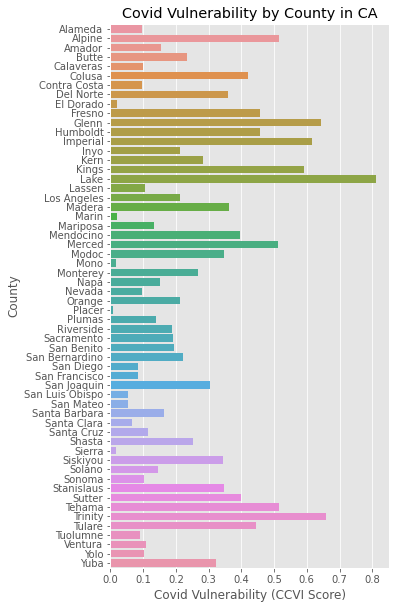

In [ ]:
import seaborn as sns # for visuals
import matplotlib.pyplot as plt # for graphs
# how graphs are printed
%matplotlib inline 
plt.style.use('ggplot')

# Plot Covid Vulnerability by County
ax = sns.barplot(x='ccvi_score', y='county', data=ca_df_raw)
fig = plt.gcf()
fig.set_size_inches(5, 10)
plt.xlabel("Covid Vulnerability (CCVI Score)")
plt.ylabel("County")
plt.title("Covid Vulnerability by County in CA")
# plt.savefig("ccvi_by_county.png", format='png',dpi=150)

Text(0.5, 1.0, 'Covid Total Deaths by County in CA')

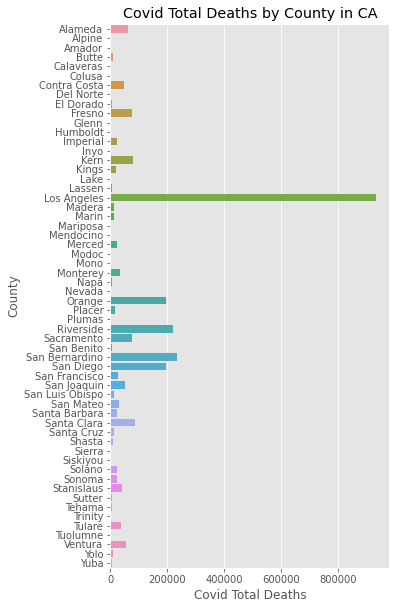

In [ ]:
# Plot Covid Total Deaths by County
ax = sns.barplot(x='covid_total', y='county', data=ca_df_raw)
fig = plt.gcf()
fig.set_size_inches(5, 10)
plt.xlabel("Covid Total Deaths")
plt.ylabel("County")
plt.title("Covid Total Deaths by County in CA")

In [ ]:
# TODO: fix mapping code

# map ccvi data

# Drop columns not using for visualization
ca_df_raw.drop(['state', 'abbreviation', 'fips', 't1_socioecon',
       't2_household', 't3_minority', 't4_housing', 'epidim', 'healthcare_sys',
       'long', 'lat', 'covid_total', 'covid_deaths',
       'todays_date', 'covid_confirmed', 'covid_suspected',
       'covid_total_hospitalized', 'all_hospital_beds',
       'icu_covid_confirmed_patients', 'icu_suspected_covid_patients',
       'icu_available_beds'],axis=1, inplace=True)
 
'''
# Write df to csv in gdrive via colab for map
with open('/content/drive/My Drive/Colab Notebooks/ca_df_raw.csv', 'w') as f:
  ca_df_raw.to_csv(f)
'''

import folium as folium

# JSON overlay for choropleth map
base = 'https://github.com/python-visualization/folium/raw/master/examples/data/'
antarctic_ice_edge = base + 'antarctic_ice_edge.json'

m = folium.Map(
    location=[-59.1759, -11.6016],
    tiles='Mapbox Bright',
    zoom_start=2
)

folium.GeoJson(
    antarctic_ice_edge,
    name='geojson'
).add_to(m)

folium.LayerControl().add_to(m)

m

# Make this Notebook Trusted to load map: File -> Trust Notebook
state_geo = base + 'us-states.json'
state_ccvi = '/content/drive/My Drive/Colab Notebooks/ca_df_raw.csv'
state_data = pd.read_csv(state_ccvi)

m = folium.Map(location=[48, -102], zoom_start=3)

m.choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=state_data,
    columns=['state', 'ccvi'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='CCVI Score'
)

folium.LayerControl().add_to(m)

m

FileNotFoundError: ignored